## Numpy, pandas (Titanic processing), mathplotlib

## Numpy


In [2]:
import numpy as np
import math

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

Функция, возвращающая округленную взвешенную сумму оценок по данным оценкам и весам. 

In [3]:
def result_mark(weights: np.array, marks: np.array) -> int:
    res = weights[0]*marks[0] + weights[1]*marks[1]+weights[2]*marks[2]+ weights[3]*marks[3]
    return math.floor(res + 0.5)

In [4]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [5]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

Функция, которая принимает на вход два целочисленных массива одинаковой длины, и возвращает минимальный и максимальный из тех элементов этих двух массивов у которых совпадает и позиция и значение (то есть из всех элементов $\{a[i]: a[i] = b[i]\}$).

In [6]:
import itertools
def minMaxEqual(a: np.array, b: np.array) -> tuple:
    c=np.vstack((a, b))
    d=list(c.mean(axis=0)==a)
    numbers=np.nonzero(d)
    return(min(a[numbers]), max(a[numbers]))

In [7]:
a = np.array([4, 2, 6, 3])
b = np.array([4, 3, 6, -3])

assert minMaxEqual(a, b) == (4, 6)

In [8]:
a = np.array([0, 0, 0, 0, 0])
b = np.array([0, 0, 0, 0, 0])

assert minMaxEqual(a, b) == (0, 0)

In [9]:
a = np.array([-1, -1, -1, 1, 0])
b = np.array([1, -1, 1, 1, 0])

assert minMaxEqual(a, b) == (-1, 1)

Функция, выдающая индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения.

In [10]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
    modules=np.array(abs(array1-array2))
    d=list(modules<=precision)
    return(np.array(*np.nonzero(d)))

In [11]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [12]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

Функция, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица.

In [13]:
def block_matrix(block: np.array) -> np.array:
    return(np.vstack((np.hstack((block, block)), np.hstack((block, block)))))


In [14]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

Функция, вычисляющая произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы.

In [15]:
def diag_prod(matrix: np.array):
    a=np.prod(np.delete(matrix.diagonal(), 0))
    return a

In [16]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

Функция, нормализующуя входящую матрицу (по столбцам).

In [17]:
def normalize(matrix: np.array) -> np.array:
    matrix=(matrix-matrix.mean(axis=0)) / matrix.std(axis=0)
    return matrix

In [18]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [19]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

Функция, делающая матрицу симметричной.

In [20]:
def make_symmetric(matrix: np.array) -> np.array:
    index = np.triu_indices_from(matrix,k=1)
    matrix[(index[1], index[0])] = matrix[index]
    return matrix

In [21]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [22]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

Функция, создающая прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке.

In [23]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    tired=np.arange(a, b+1)
    kmp=np.tile(tired, m).reshape(m, b+1-a)
    return kmp

In [24]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [25]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

Функция, вычисляющая косинусную близость двух векторов. 

In [26]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    from numpy import dot
    from numpy.linalg import norm
    cos_sim = dot(vec1, vec2)/(norm(vec1)*norm(vec2))
    return cos_sim

In [27]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [28]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

Функция, которая принимает параметры `lims: ndarray размера 2`, `k: float`, `b: float`, `n: int`, `noise_level: float` и возвращает выборку из n объектов, сгенерированную по правилу `y_i = k*x_i + b + U[-noise_level; noise_level]`. Где каждый x_i генерируется равномерно из `U[lims[0]; lims[1]]` (U[a, b] — равномерное распределение на [a, b]). Функция возвращает кортеж, первым элементом которого будет массив x, и вторым элементом массив y — значения функции в точках этого массива.

In [29]:
import random
def gen_data(lims: np.array, k: float, b: int, n: int, noise_level: float):
    x=np.random.uniform(low=lims[0], high=lims[1], size=(n,)) 
    vfunc = np.vectorize(lambda x_i: k*x_i+b+random.uniform(-noise_level,noise_level)) 
    y=vfunc(x) 
    return (x,y)

In [30]:
gen_data((-1, 1), 2, 0, 20,  1e-1)

(array([ 0.54930262, -0.1720427 ,  0.32545525, -0.75615121,  0.53094372,
        -0.7239287 , -0.39267718, -0.17890801, -0.93856222,  0.92589402,
         0.08672537, -0.14589498,  0.0331874 ,  0.83569049,  0.10466824,
         0.62196249, -0.09921522, -0.86299223, -0.38607573,  0.65906927]),
 array([ 1.18410355, -0.41048608,  0.56225573, -1.4792404 ,  1.15804006,
        -1.45495019, -0.69260768, -0.42753018, -1.92667294,  1.82354524,
         0.2232363 , -0.23036224,  0.02272679,  1.57459034,  0.14368748,
         1.16232882, -0.1783555 , -1.80024708, -0.73686406,  1.32985916]))

## Pandas

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

Описание данных:

https://www.kaggle.com/c/titanic/data


In [36]:


pass_data = pd.read_csv('train.csv')
pass_data.shape

(891, 12)

In [37]:
pass_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
pass_data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [39]:
pass_data['Survived'].mean()

0.3838383838383838

In [40]:
pass_data.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [41]:
pass_data['Pclass'].value_counts() 

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [42]:
pass_data[(pass_data.Pclass == 3)]['Sex'].value_counts() 

male      347
female    144
Name: Sex, dtype: int64

In [43]:
pass_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
pass_data['Fare'].min()
# не заменяем ничем 0, т. к. это не выбросы, а билеты, например, работников 

0.0

In [45]:
pass_data['Fare'].mean()

32.2042079685746

In [46]:
pass_data['Fare'].max()

512.3292

In [47]:
pass_data[(pass_data.Embarked == 'S')].Fare.min()

0.0

In [48]:
pass_data[(pass_data.Embarked == 'S')].Fare.mean()

27.07981180124218

In [49]:
pass_data[(pass_data.Embarked == 'S')].Fare.max()

263.0

In [50]:
pass_data.groupby('Embarked').describe() 

PassengerId                          ...   Fare                     
               count        mean         std  ...    50%        75%       max
Embarked                                      ...                            
C              168.0  445.357143  259.454201  ...  29.70  78.500025  512.3292
Q               77.0  417.896104  253.646282  ...   7.75  15.500000   90.0000
S              644.0  449.527950  256.942044  ...  13.00  27.900000  263.0000

[3 rows x 56 columns]

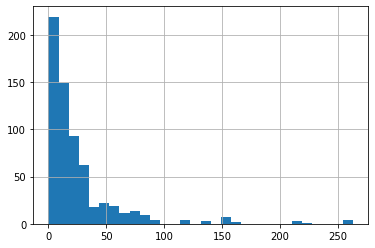

In [51]:
pass_data[(pass_data.Embarked == 'S')].Fare.hist(bins = 30)

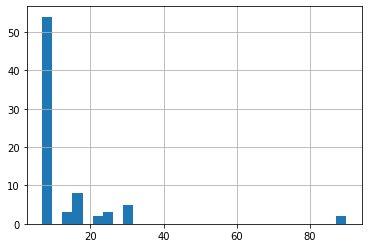

In [52]:
pass_data[(pass_data.Embarked == 'Q')].Fare.hist(bins = 30)

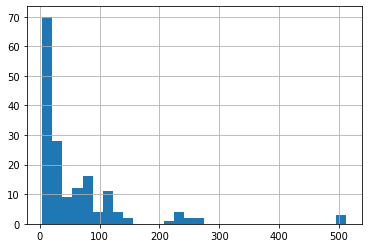

In [53]:
pass_data[(pass_data.Embarked == 'C')].Fare.hist(bins = 30)

In [54]:
pass_data = pass_data.drop('PassengerId', 1)
pass_data = pass_data.drop('Ticket', 1)
pass_data = pass_data.drop('Cabin', 1)

# с индексом пассажира и номером билета нельзя ничего сделать; в Cabin слишком много NaN

In [55]:
pass_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [56]:
pass_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [57]:
pass_data['Age'] = pass_data['Age'].fillna(pass_data['Age'].mean())

In [58]:
pass_data['Embarked'] = pass_data['Embarked'].fillna('S')

In [59]:
pass_data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [60]:
pass_data[['Fare', 'Age']].corr()

,Fare,Age
Fare,1.000000,0.091566
Age,0.091566,1.000000


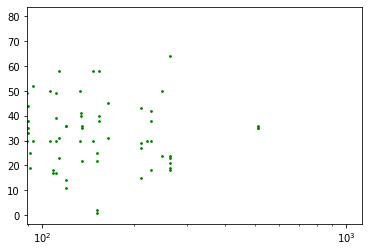

In [61]:
plt.scatter(pass_data['Fare'], pass_data['Age'], s=3, color='green')
plt.xscale('log')
# с логарифмированной шкалой цен хоть немного веселее, график в целом не слишком полезный, и это предсказуемо по корреляции.

In [62]:
pass_data.groupby('Survived')['Fare'].mean()
# да, правда

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [63]:
pass_data.groupby('Survived')['Pclass'].value_counts() 
# больше всего умерших в третьем классе, больше всего выживших в первом классе

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: Pclass, dtype: int64

In [64]:
# бесполезно проверять с Cabin, т. к. там 80% пропусков. Зависимость, возможно, есть, потому что 
# номер отражает положение на корабле, но проверить проблематично. А еще этот столбец уже удален :( 

In [65]:
pass_data['Metoo'] = pass_data.SibSp+1

In [66]:
def get_status(name):
    blah=name.split(',')[1].strip()
    return blah.split('.')[0].strip()
status = pass_data['Name'].apply(get_status)
pass_data['Status'] = status
pass_data['Status']
# признак - статус, по которому можно считать, например, семейное положение

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Status, Length: 891, dtype: object

In [67]:
# Какого статуса женщин выжило больше всего?
pass_data[(pass_data.Sex == 'female') & (pass_data.Survived == 1) ].Status.value_counts()
# Казалось бы...

Miss            127
Mrs              99
Mlle              2
Dr                1
the Countess      1
Mme               1
Ms                1
Lady              1
Name: Status, dtype: int64

In [68]:
pass_data.dtypes
# проблема распределения вещественных признаков в их ненормальности. Если бы у меня было больше минуты, я бы объяснила,
# почему одно нехарактерное значение ломает всю гистограмму, если большинство значений слишком мало.
# поэтому нормализуем и стандартизуем. Нормализуем, чтобы привести к заданному диапазону, стандартизуем, чтобы
# отклонение было 1 и среднее 0. А еще я не успела вставить легенду в регрессию ниже, но у других групп дедлайн через неделю.
# Вот так.

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Metoo         int64
Status       object
dtype: object

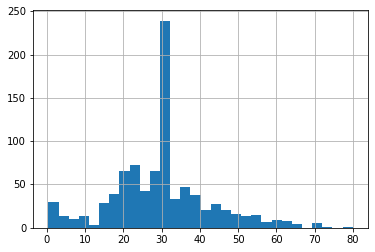

In [69]:
pass_data['Age'].hist(bins = 30)

In [70]:
from sklearn import preprocessing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f40696cb4e0>]],
      dtype=object)

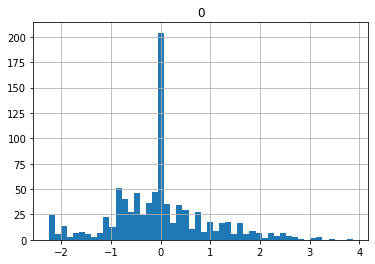

In [71]:
standardized_A = preprocessing.scale(pass_data['Age'])
datasad=pd.DataFrame(standardized_A)
datasad.hist(bins=50)

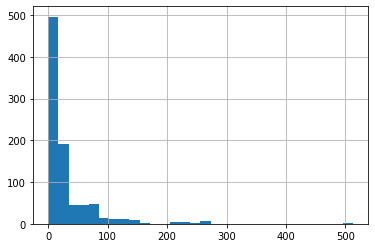

In [72]:
pass_data['Fare'].hist(bins = 30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f40692c25c0>]],
      dtype=object)

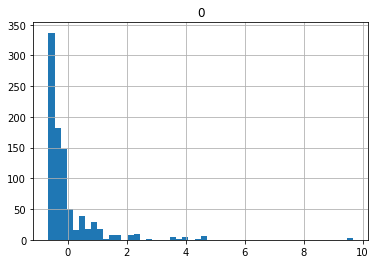

In [73]:
standardized_X = preprocessing.scale(pass_data['Fare'])
dataset=pd.DataFrame(standardized_X)
dataset.hist(bins=50)

In [74]:
pass_data['Embarked'] = pass_data['Embarked'].replace('S', 0)
pass_data['Embarked'] = pass_data['Embarked'].replace('S', 1)
pass_data['Embarked'] = pass_data['Embarked'].replace('S', 2)
pass_data['Sex'] = pass_data['Sex'].replace('female', 0)
pass_data['Sex'] = pass_data['Sex'].replace('male', 1)

## Matplotlib

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Text(0, 0.5, 'Число пассажиров')

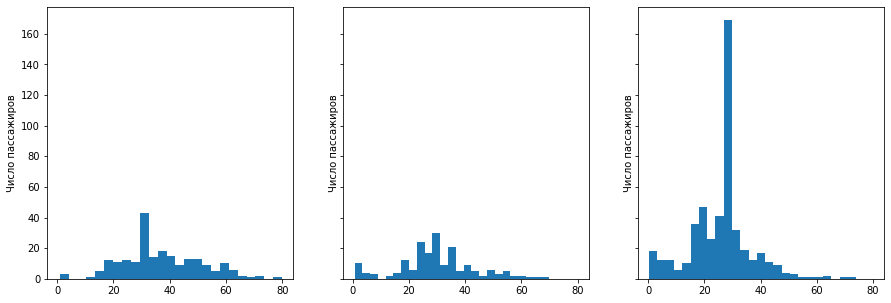

In [78]:
fig, ax = plt.subplots(1,3, figsize = (15, 5), sharey = True, sharex = True)
ax[0].hist(pass_data[(pass_data.Pclass == 1)].Age, bins = 25)
ax[1].hist(pass_data[(pass_data.Pclass == 2)].Age, bins = 25)
ax[2].hist(pass_data[(pass_data.Pclass == 3)].Age, bins = 25)
ax[0].set_ylabel('Число пассажиров')
ax[1].set_ylabel('Число пассажиров')
ax[2].set_ylabel('Число пассажиров')

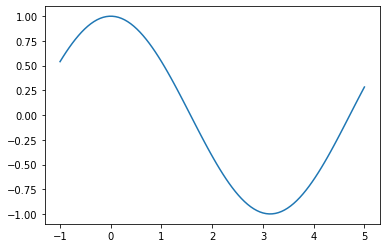

In [79]:
x = np.linspace(-1,5,100)
plt.plot(x, np.cos(x))
plt.show()

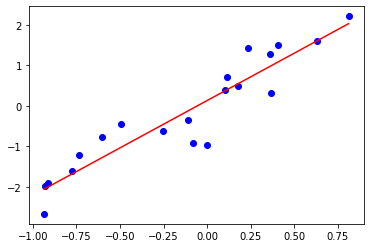

In [80]:
from sklearn.linear_model import LinearRegression as LR
x,y = gen_data((-1, 1), 2, 0, 20,  1)
from scipy import stats
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()